### **Load libraries**

In [1]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import risk_kit as rk
from mgarch import mgarch
import importlib

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

### **Load data**

In [4]:
rets = pd.read_csv('selected_stocks_rets.csv', index_col=0)
stocks = pd.read_csv('selected_stocks_stocks.csv', index_col=0)

In [5]:
expected_returns = pd.read_csv('expected_returns.csv', index_col=0, header=None).iloc[:,0]
expected_covmat = pd.read_csv('expected_covmat.csv', index_col=0)

In [6]:
# Define the number of periods per year for all calculations
# 252 is an approximation for daily
# 54 for weekly
# 12 for monthly
periods_per_year = 54

### **Initial examination**

In [7]:
summary_stats = rk.summary_stats(rets, periods_per_year=periods_per_year, riskfree_rate=0)
summary_stats

,Annualized Return,Annualized Volatility,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
BCOLOMBIA.CL,0.195632,0.435852,0.464426,12.802137,0.072685,0.114873,0.448849,-0.312086
BOGOTA.CL,-0.112759,0.360216,-0.616389,8.992686,0.083912,0.127198,-0.313031,-0.625821
BVC.CL,0.147084,0.298131,0.712720,6.365696,0.052018,0.079822,0.493354,-0.356135
CELSIA.CL,0.047263,0.297457,0.841626,6.113642,0.052157,0.083216,0.158891,-0.506966
CNEC.CL,-0.258196,0.365075,0.294880,8.273316,0.076461,0.113531,-0.707241,-0.850648
CORFICOLCF.CL,0.003320,0.342341,0.260319,6.413842,0.068769,0.103975,0.009698,-0.600359
ECOPETROL.CL,0.106822,0.431014,0.255935,6.508946,0.084388,0.125831,0.247838,-0.397956
ENKA.CL,0.131863,0.465202,1.790732,10.720112,0.054053,0.107516,0.283453,-0.554540
GEB.CL,0.210232,0.306868,0.683049,4.974326,0.054156,0.077209,0.685088,-0.469272
GRUBOLIVAR.CL,0.063124,0.371304,1.143924,9.285084,0.056659,0.100988,0.170007,-0.534127


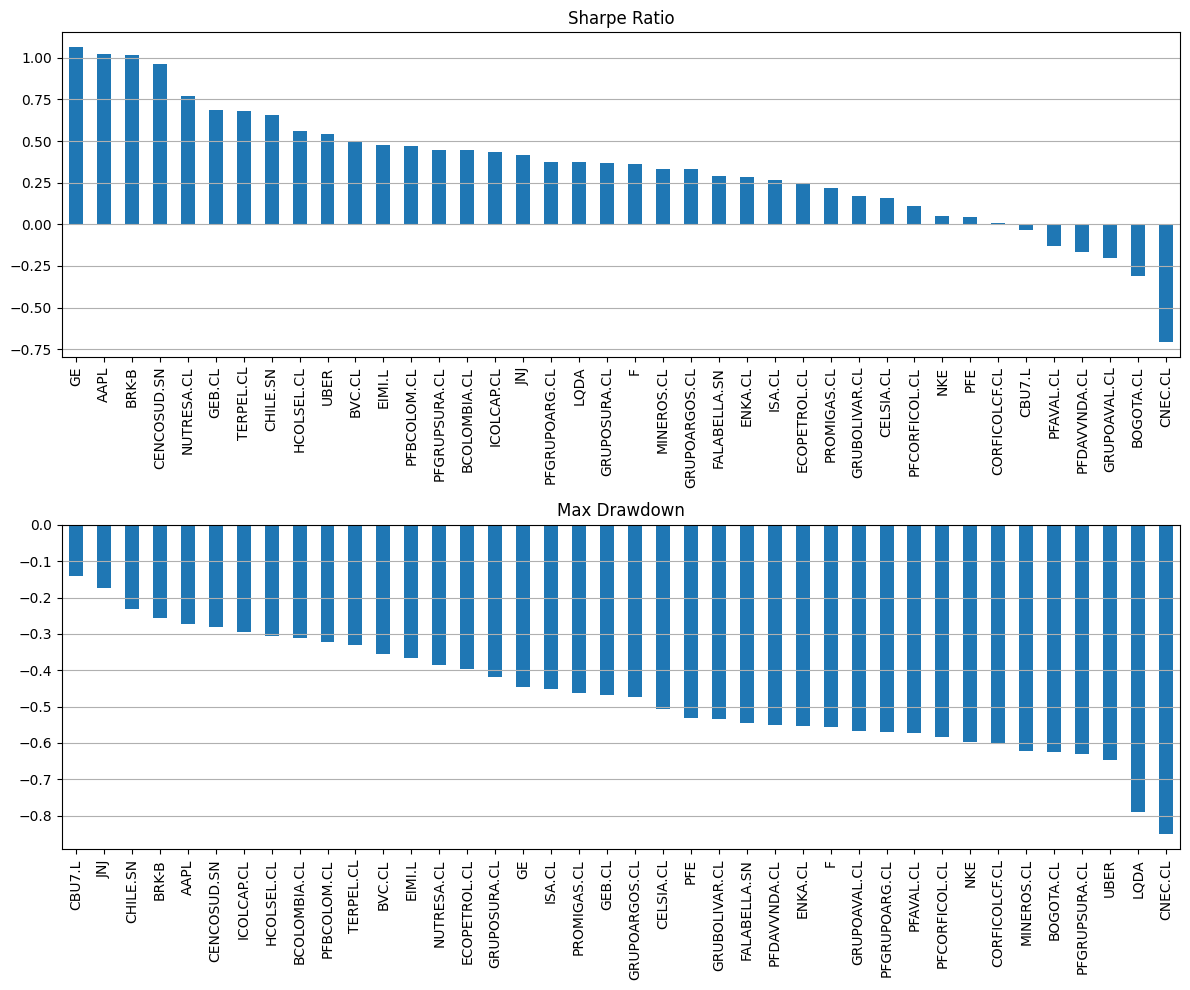

In [8]:
# Plot some return, volatility, and risk rankings to get a view of relevant stocks
summary_stats = rk.summary_stats(rets, periods_per_year=periods_per_year)
#plot1_series = summary_stats['Annualized Return'].sort_values(ascending=False)
#plot2_series = summary_stats['Annualized Volatility'].sort_values(ascending=True)
#plot1_series = summary_stats['Cornish-Fisher VaR (5%)'].sort_values(ascending=False)
#plot2_series = summary_stats['Historic CVaR (5%)'].sort_values(ascending=False)
plot1_series = summary_stats['Sharpe Ratio'].sort_values(ascending=False)
plot2_series = summary_stats['Max Drawdown'].sort_values(ascending=False)

fig, axes = plt.subplots(2, 1, figsize=(12, 10))
plot1_series.plot.bar(ax = axes[0], legend=False, title=plot1_series.name)
plot2_series.plot.bar(ax=axes[1], legend=False, title=plot2_series.name)
axes[0].grid(axis='y')
axes[1].grid(axis='y')
plt.tight_layout()

In [9]:
# Identify stock pairs with very high correlation

# Generate correlation matrix
corr_mat = rets.corr()
# Generate a mask to exclude  duplicated pairs
#mask = np.triu(np.ones_like(corr_mat))
#corr_mat = corr_mat*mask
# Convert the matrix into a dataframe structured as a list of pairs with their respective correlations
stack_corr = pd.DataFrame(corr_mat.stack())
stack_corr = stack_corr[stack_corr[0] < 1]
stack_corr = stack_corr[stack_corr[0] != 0]
stack_corr.index.names = ['Stock 1', 'Stock 2']
stack_corr.reset_index(inplace=True)
#(abs(stack_corr[0]) > .7).sum()

# Filter to visualize only the pairs with very high correlations
high_corrs = stack_corr[stack_corr[0] >= 0.8].sort_values(by=0, ascending=False)
high_corrs

,Stock 1,Stock 2,0
18,BCOLOMBIA.CL,PFBCOLOM.CL,0.883516
741,PFBCOLOM.CL,BCOLOMBIA.CL,0.883516
564,ICOLCAP.CL,PFBCOLOM.CL,0.829075
755,PFBCOLOM.CL,ICOLCAP.CL,0.829075
520,HCOLSEL.CL,ICOLCAP.CL,0.827157
559,ICOLCAP.CL,HCOLSEL.CL,0.827157


In [10]:
# Check the average correlation coefficient of each stock
stack_corr.groupby('Stock 1')[0].mean().sort_values(ascending=False)

Stock 1
ICOLCAP.CL       0.398506
HCOLSEL.CL       0.360616
PFBCOLOM.CL      0.358341
BCOLOMBIA.CL     0.338359
PFGRUPSURA.CL    0.328399
PFDAVVNDA.CL     0.313194
PFAVAL.CL        0.312980
PFGRUPOARG.CL    0.311205
CORFICOLCF.CL    0.284560
GRUPOARGOS.CL    0.283163
CELSIA.CL        0.252540
BRK-B            0.252180
ECOPETROL.CL     0.250986
EIMI.L           0.249509
ISA.CL           0.247735
GE               0.226103
NKE              0.224858
BOGOTA.CL        0.222646
MINEROS.CL       0.221962
F                0.219864
GRUPOSURA.CL     0.215934
GRUBOLIVAR.CL    0.196561
PFCORFICOL.CL    0.185158
CENCOSUD.SN      0.183481
GRUPOAVAL.CL     0.183202
TERPEL.CL        0.174409
AAPL             0.167795
JNJ              0.164026
BVC.CL           0.158700
UBER             0.150601
GEB.CL           0.149194
PROMIGAS.CL      0.144851
FALABELLA.SN     0.142889
PFE              0.118546
CNEC.CL          0.076906
ENKA.CL          0.073489
CHILE.SN         0.066897
NUTRESA.CL       0.041575
CBU7

### **Identify Combination with the maximum Sharpe-Ratio**

In [11]:
# Based on historical returns
n_periods = 162
# returns = rk.summary_stats(rets.iloc[-n_periods:], periods_per_year=periods_per_year)['Annualized Return']
# covmat = rets.iloc[-n_periods:].cov()

# Based on predicted returns
returns = expected_returns
covmat = expected_covmat

In [26]:
# Loop that calculates the combination that maximizes the Sharpe ratio several times until no stock has less than 5% of weight
rf_rate = .11   # Currently, the 10-Y  bond yield is at 11.2%
initial_weights = rk.msr(riskfree_rate=rf_rate,
                         returns=returns,
                         covmat=covmat,
                         periods_per_year=periods_per_year)
optimal_allocation = pd.DataFrame(data=initial_weights, index=returns.index, columns=['Weights']).sort_values(by='Weights')

while optimal_allocation.min().values < .05:
    optimal_allocation = optimal_allocation[1:]
    weights = rk.msr(riskfree_rate=rf_rate,
                     returns=returns[optimal_allocation.index],
                     covmat=covmat.loc[optimal_allocation.index,
                     optimal_allocation.index], 
                     periods_per_year=periods_per_year)
    optimal_allocation = pd.DataFrame(data=weights, index=optimal_allocation.index, columns=['Weights']).sort_values(by='Weights')

chosen_allocation = optimal_allocation
chosen_allocation

,Weights
0,
FALABELLA.SN,0.062106
UBER,0.062592
CENCOSUD.SN,0.094251
NUTRESA.CL,0.119317
PROMIGAS.CL,0.133777
PFGRUPSURA.CL,0.134665
GRUPOAVAL.CL,0.156332
JNJ,0.236960


In [14]:
"""
# Alternative methodology finding the combination that maximizes the Sharpe ratio and then removing any stock with a weight below 5%
rf_rate = .11   # Currently, the 10-Y  bond yield is at 11.2%

weights = rk.msr(riskfree_rate=rf_rate, return_series=rets, periods_per_year=periods_per_year)
optimal_allocation = pd.DataFrame(data=weights.round(4), index=rets.columns, columns=['Weights'])
optimal_allocation = optimal_allocation[optimal_allocation['Weights'] >= .05]

# Reduce the portfolio stocks to only those for which shares of over 3% is recommended
chosen_allocation = optimal_allocation[optimal_allocation['Weights'] > .05]
chosen_allocation = chosen_allocation / chosen_allocation.sum()
chosen_allocation.sort_values(by='Weights')
"""

"\n# Alternative methodology finding the combination that maximizes the Sharpe ratio and then removing any stock with a weight below 5%\nrf_rate = .11   # Currently, the 10-Y  bond yield is at 11.2%\n\nweights = rk.msr(riskfree_rate=rf_rate, return_series=rets, periods_per_year=periods_per_year)\noptimal_allocation = pd.DataFrame(data=weights.round(4), index=rets.columns, columns=['Weights'])\noptimal_allocation = optimal_allocation[optimal_allocation['Weights'] >= .05]\n\n# Reduce the portfolio stocks to only those for which shares of over 3% is recommended\nchosen_allocation = optimal_allocation[optimal_allocation['Weights'] > .05]\nchosen_allocation = chosen_allocation / chosen_allocation.sum()\nchosen_allocation.sort_values(by='Weights')\n"

<Axes: xlabel='Date'>

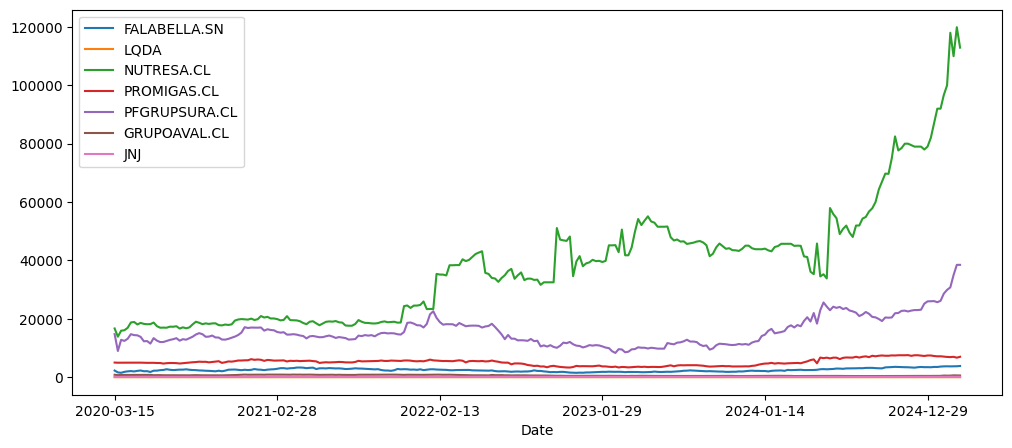

In [15]:
stocks[optimal_allocation.index].plot(figsize=(12, 5))

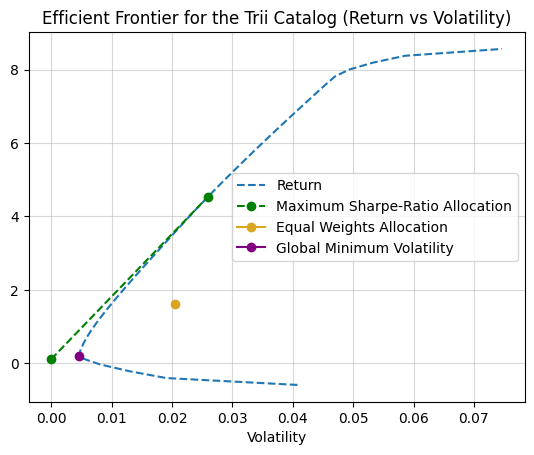

In [16]:
rk.plot_ef(50, style = '--', show_cml=True, show_ew=True, show_gmv=True, riskfree_rate=rf_rate,
           returns=returns, covmat=covmat, periods_per_year=periods_per_year)
plt.title('Efficient Frontier for the Trii Catalog (Return vs Volatility)')
plt.grid(alpha=.5)

### **Create an index for the chosen allocation**

In [27]:
# Generate a dataframe to represent the evolution of the allocation in each stock
weights = chosen_allocation['Weights']
allocated_index = (rets[weights.index] + 1).cumprod()*weights

# Add a column to represent the index
allocated_index['index'] = allocated_index.sum(axis='columns')
allocated_index.index = pd.to_datetime(allocated_index.index.str.split('/').str[0])

# Generate a row to represent an earlier period before returns are made,
# corresponding to the time when the index equal 1
first_period = allocated_index.index[0]
starting_period = first_period - pd.offsets.Week(weekday=6)   # Uncomment to generate a week starting period
#starting_period = first_period - pd.offsets.DateOffset(months=1)   # Uncomment to generate a month starting period
starting_period

allocation_start = pd.DataFrame(index=[starting_period], columns=allocated_index.columns)
allocation_start.iloc[:, :-1] = 1*weights
allocation_start['index'] = 1

# Append the row to the allocated_index dataframe
allocated_index = pd.concat([allocation_start, allocated_index], axis='rows')
allocated_index.head()

,FALABELLA.SN,UBER,CENCOSUD.SN,NUTRESA.CL,PROMIGAS.CL,PFGRUPSURA.CL,GRUPOAVAL.CL,JNJ,index
2020-03-15,0.062106,0.062592,0.094251,0.119317,0.133777,0.134665,0.156332,0.23696,1.000000
2020-03-22,0.044956,0.059075,0.068858,0.099185,0.132452,0.081898,0.132485,0.21155,0.830459
2020-03-29,0.041318,0.075553,0.084825,0.113888,0.132813,0.116801,0.145733,0.21732,0.928252
2020-04-05,0.050101,0.063201,0.097909,0.114938,0.132813,0.113366,0.145733,0.236748,0.954809
2020-04-12,0.054571,0.075083,0.104229,0.120773,0.132813,0.119962,0.146399,0.249206,1.003034


In [28]:
# Generate a dataframe with the returns of the index
allocated_index_returns = (allocated_index/allocated_index.shift(1) - 1).dropna()
allocated_index_returns.head()

,FALABELLA.SN,UBER,CENCOSUD.SN,NUTRESA.CL,PROMIGAS.CL,PFGRUPSURA.CL,GRUPOAVAL.CL,JNJ,index
2020-03-22,-0.276151,-0.056195,-0.26942,-0.168724,-0.009901,-0.391837,-0.152542,-0.10723,-0.169541
2020-03-29,-0.080925,0.27895,0.231884,0.148235,0.002721,0.426174,0.1,0.027275,0.117757
2020-04-05,0.212579,-0.16349,0.154248,0.009222,0.0,-0.029411,0.0,0.089396,0.028610
2020-04-12,0.089212,0.187993,0.064553,0.050762,0.0,0.058182,0.004566,0.05262,0.050507
2020-04-19,0.047619,0.032829,0.03734,0.109566,0.0,0.120275,0.0,0.0764,0.055487


In [29]:
summary_stats = rk.summary_stats(allocated_index_returns, periods_per_year=periods_per_year, riskfree_rate=0)
summary_stats

,Annualized Return,Annualized Volatility,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
FALABELLA.SN,0.113970,0.394741,0.213202,7.783583,0.076427,0.111322,0.288720,-0.545422
UBER,0.282773,0.523624,1.119356,7.366235,0.079531,0.129608,0.540031,-0.648029
CENCOSUD.SN,0.344821,0.359359,-0.339160,9.401888,0.072012,0.105779,0.959545,-0.281198
NUTRESA.CL,0.487169,0.631700,3.916598,30.993460,-0.038141,0.137022,0.771202,-0.386119
PROMIGAS.CL,0.071399,0.330773,2.336595,30.080715,0.012684,0.094073,0.215853,-0.463308
PFGRUPSURA.CL,0.220018,0.490094,0.603640,13.729207,0.077451,0.131508,0.448931,-0.631914
GRUPOAVAL.CL,-0.068511,0.338460,0.856512,8.350659,0.059210,0.100790,-0.202421,-0.567025
JNJ,0.075687,0.181828,0.116735,4.512532,0.037460,0.047442,0.416256,-0.174333
index,0.209219,0.191843,-0.425280,12.310058,0.037236,0.053752,1.090573,-0.221569


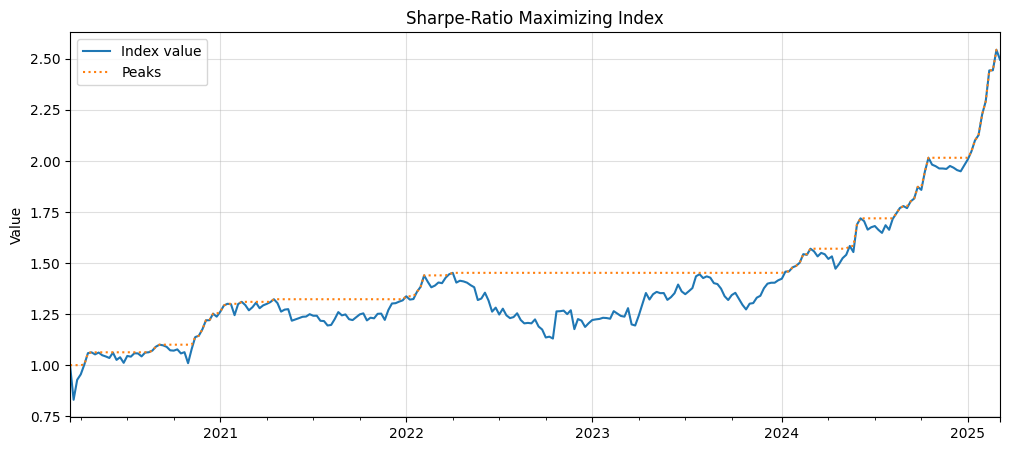

In [30]:
# Visualize the evolution of the index
allocated_index['index'].plot(figsize=(12, 5), label='Index value')
allocated_index['index'].cummax().plot(linestyle=':', label='Peaks')
plt.legend()
plt.ylabel('Value')
plt.title('Sharpe-Ratio Maximizing Index')
plt.grid(alpha=0.4)

### **Export datasets and an index for the Sharpe-Ratio maximizing allocation**

In [31]:
# Allocation index and returns
allocated_index.to_csv('allocated_index.csv')
allocated_index_returns.to_csv('allocated_index_returns.csv')